## Model Evaluation

- So far, learned about two classifiers:

    - SVM
    
    - Logistic Regression
    
- How we can evalute which model performs better for our classification task?
    

### Lets review the confusion matrix we obtained from logistic regression model for diabetes dataset

<img src="Images/confusion_matrix.png" width="500" height="500">

# Classifier Model Evaluation Metrics

## What is accuracy, recall, precision, Specificity and F1-score?

- Accuracy, recall, precision, Specificity and F1-score are all obtained from Confision Matrix elements known as : TN, FP, FN, TP

Accuracy: overall, how often is the classifier correct? -> $accuracy = \frac {TP + TN}{TP+TN+FP+FN}$

Classification error: overall, how often is the classifier incorrect? -> $error = 1- accuracy = \frac {FP + FN}{TP + TN + FP + FN}$

Recall: when the actual value is positive, how often is the prediction correct? -> $recall = \frac {TP}{TP + FN}$

Precision: When a positive value is predicted, how often is the prediction correct? -> $precision = \frac {TP}{TP + FP}$

Specificity: When the actual value is negative, how often is the prediction correct? -> $Specificity = \frac {TN}{TN + FP}$

F1-score = 2 x (Precision x Recall )/(Precision + Recall)


## Activity:  Write a function that returns Accuray, Precision, Recall, F1-score from Confision Matrix

In [13]:
from sklearn import metrics
import numpy as np

# confusion = metrics.confusion_matrix(y_test, y_pred)
# print(confusion)

confusion = np.array([[118., 12.], [ 47., 15.]])
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Accuray = ((TP + TN) / float(TP + TN + FP + FN))

Precision = TP / float(TP + FP)

Recall = TP / float(FN + TP)

F1_score = 2*Precision*Recall/float(Precision+Recall)

print((Accuray, Precision, Recall, F1_score))

(0.6927083333333334, 0.5555555555555556, 0.24193548387096775, 0.3370786516853933)


## Activity (Reminder): How we can obtain y_pred (whose elements are 0 and 1) from :

- `y_pred_prob = logreg.predict_proba(X_test)`

## Activity: Change the threshold of Logistic Regression (y_pred_prob) to get new confusion matrix and better model performance

- The question now is which threshold is better?

- To do this:

1- Train `logreg = LogisticRegression()` and get `y_pred_prob = logreg.predict_proba(X_test)`

2- The second column of `y_pred_prob` is the probability that a subject be diabetes 

3- Plot histogram of second column. Hint: `plt.hist(y_pred_prob[:, 1], bins=8) plt.show()`

4- Count how many of `y_train` is 0 how many is 1. Define thershold as `threshold = y_train.value_counts()[1] / len(y_train)`

5- Write a function that returns 0 if `y_pred_prob[:, 1]` is less than threshold, else returns 1 for all elements in `y_pred_prob`

6- Calculate the Confuction Matrix by `confusion = metrics.confusion_matrix(y_test, y_pred)`

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('datasets/diabetes.csv')
print(pima.columns)
print(pima.head())

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

X = pima[feature_cols]
# print(X)
# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [15]:
y_pred_prob

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697],
       [0.67706284, 0.32293716],
       [0.17592894, 0.82407106],
       [0.65188551, 0.34811449],
       [0.81908609, 0.18091391],
       [0.57723535, 0.42276465],
       [0.84784349, 0.15215651],
       [0.55345312, 0.44654688],
       [0.92650973, 0.07349027],
       [0.53364769, 0.46635231],
       [0.64953808, 0.35046192],
       [0.52797559, 0.47202441],
       [0.60807542, 0.39192458],
       [0.84629224, 0.15370776],
       [0.55795178, 0.44204822],
       [0.89896018, 0.10103982],
       [0.77361357, 0.22638643],
       [0.94411931, 0.05588069],
       [0.25730962, 0.74269038],
       [0.89509503, 0.10490497],
       [0.83251508, 0.16748492],
       [0.

In [16]:
import numpy as np

confusion = np.array([[80, 50], [16, 46]])

# confusion = np.array([[87, 43], [24, 38]])

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Accuray = ((TP + TN) / float(TP + TN + FP + FN))

Precision = TP / float(TP + FP)

Recall = TP / float(FN + TP)

F1_score = 2*Precision*Recall/float(Precision+Recall)

print((Accuray, Precision, Recall, F1_score))

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


## Comparison

- With threshold 0.5 -> `confusion = np.array([[118., 12.], [ 47., 15.]])`

- With optimal threshold -> `confusion = np.array([[80, 50], [16, 46]])`

In [17]:
# With threshold 0.5
print((Accuray, Precision, Recall, F1_score))

(0.6927083333333334, 0.5555555555555556, 0.24193548387096775, 0.3370786516853933)

# With Optimal Theshold
print((Accuray, Precision, Recall, F1_score))

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)

(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)
(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)


(0.65625, 0.4791666666666667, 0.7419354838709677, 0.5822784810126582)

## Cross-Validation

- Normally in a machine learning process, data is divided into training and test sets; the training set is then used to train the model and the test set is used to evaluate the performance of a model 

- It is possible that the accuracy obtained on one test is very different to accuracy obtained on another test set using the same algorithm

- To see the model performance, we use K-Fold Cross-Validation for performance evaluation where K is any number

- Suppose we want to perform 5-fold cross validation


<img src="Images/cross_validation.png" width="500" height="500">


## Lets obtain Accuracy and F1-Score for 5-fold cross validation based on diabetes dataset

In [18]:
from sklearn.model_selection import cross_val_score 
import pandas as pd
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('datasets/diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

print(y.value_counts()[0])
print(y.value_counts()[1])

logreg = LogisticRegression(class_weight={1: 500/268})
#logreg = LogisticRegression(class_weight={1: y.value_counts()[0]/y.value_counts()[1]})
# logreg = LogisticRegression()

all_accuracies = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='accuracy')
print(all_accuracies)
print(all_accuracies.mean())

all_f1 = cross_val_score(estimator=logreg, X=X, y=y, cv=5, scoring='f1')
print(all_f1)
print(all_f1.mean())

500
268
[0.64935065 0.65584416 0.64935065 0.70588235 0.65359477]
0.6628045157456922
[0.578125   0.55462185 0.54237288 0.64       0.576     ]
0.5782239460190857


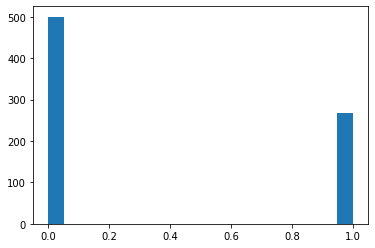

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(y, bins=20)
plt.show()

y_pd_series = pd.Series(y)
y_pd_series.value_counts()

## How to choose Models based on Cross-Validation

- We want to have low variance result for CV -> pick a model that has lower variance

- If two models have low variance result for CV -> pick a model that has higher mean

## Grid Search for Parameter Selection

- Machine learning models have hyper-parameters. To know which values of hyper-paramaeters give the best result we need grid search

- Question: what does grid search mean?

In [20]:
## Grid Search for Parameter Selection

from sklearn import svm, grid_search

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

ImportError: cannot import name 'grid_search' from 'sklearn' (/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/sklearn/__init__.py)